In [1]:
# Install missing libraries
!pip install seaborn plotly



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# 1. Import Libraries & Set Style

In [2]:
# Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats

# Set visualization style
sns.set(style="whitegrid", palette="husl", font_scale=1.1)



# 2. Load Dataset & Basic Information

In [3]:
# Load dataset
df = pd.read_csv("d:\DTD\Project\Dataset\Cleaned Dataset - DTD.csv")  # Make sure file is in same directory
df.head()
# Dataset size
print("Shape:", df.shape)
# Full column info
df.info()
# Select numeric columns and display summary statistics
numeric = df.select_dtypes(include=[np.number])
numeric.describe().T


Shape: (993, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        993 non-null    float64
 1   Administration   993 non-null    float64
 2   Marketing Spend  993 non-null    float64
 3   State            993 non-null    object 
 4   Profit           993 non-null    float64
dtypes: float64(4), object(1)
memory usage: 38.9+ KB


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\reshm\AppData\Local\Temp\ipykernel_7284\128927278.py:2: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("d:\DTD\Project\Dataset\Cleaned Dataset - DTD.csv")  # Make sure file is in same directory


,count,mean,std,min,25%,50%,75%,max
R&D Spend,993.0,81575.318421,46602.773092,0.00,43074.00000,79898.0000,124648.0000,165349.20
Administration,993.0,122967.219015,12654.020874,51283.14,116637.25120,122425.5996,129178.0329,321652.14
Marketing Spend,993.0,225996.893904,91697.986279,0.00,150244.57400,224843.0086,307894.5946,471784.10
Profit,993.0,119529.942976,43001.427394,14681.40,85842.60573,117637.6220,155791.1289,476485.43


# 3. Helper Function to Locate Columns

In [4]:
# Create a mapping for lowercase column names
cols_lower = {c.lower(): c for c in df.columns}
# Function to find correct column names
def find_col(*candidates):
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols_lower[cand.lower()]
    return None
# Automatically detect important columns
col_profit = find_col("Profit")
col_spend = find_col("Marketing Spend", "Spend")
col_state = find_col("State")

col_profit, col_spend, col_state


('Profit', 'Marketing Spend', 'State')

# 4. Distribution Plots (Histograms + KDE)

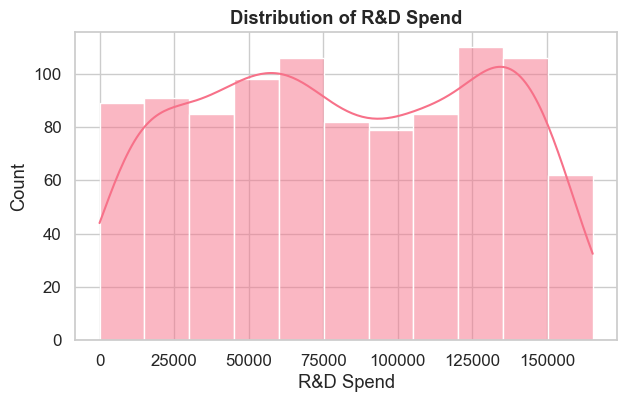

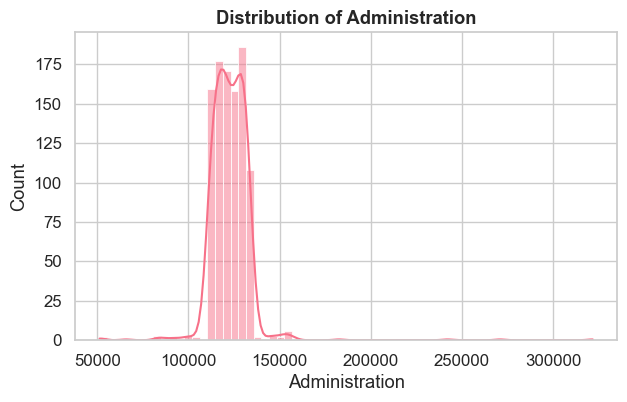

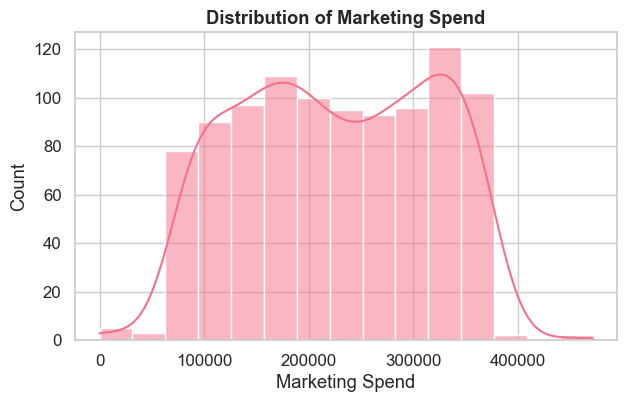

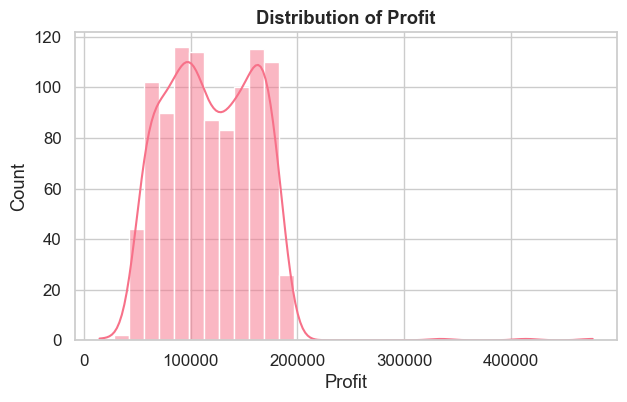

In [5]:
# Plot histogram + KDE for each numeric column
for col in numeric.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}", weight='bold')
    plt.xlabel(col)
    plt.show()


# 5. Boxplots (Outlier Visualization)

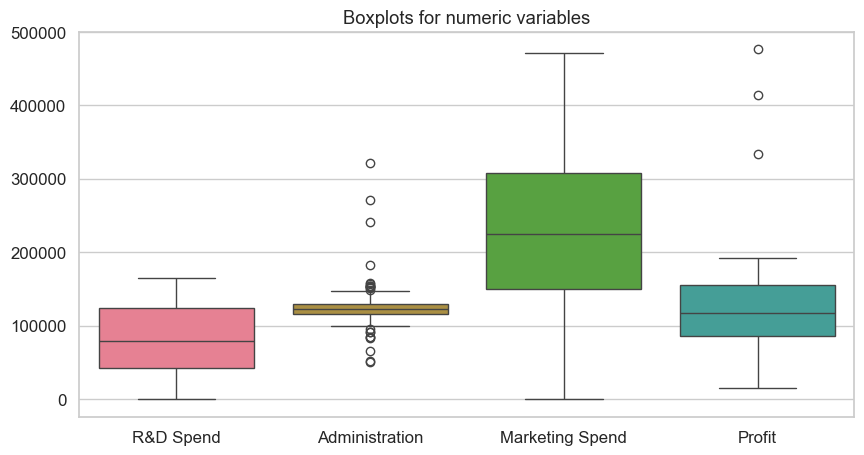

In [6]:
# Boxplot for all numeric variables
# Purpose: Quickly identify outliers and understand the spread of each variable.
# Boxplots highlight the median, quartiles, and extreme values (potential outliers).
plt.figure(figsize=(10,5))
sns.boxplot(data=numeric)
plt.title("Boxplots for numeric variables")
plt.show()


# 6. Scatter Plots (Spend vs Profit)

## Seaborn Regression Plot

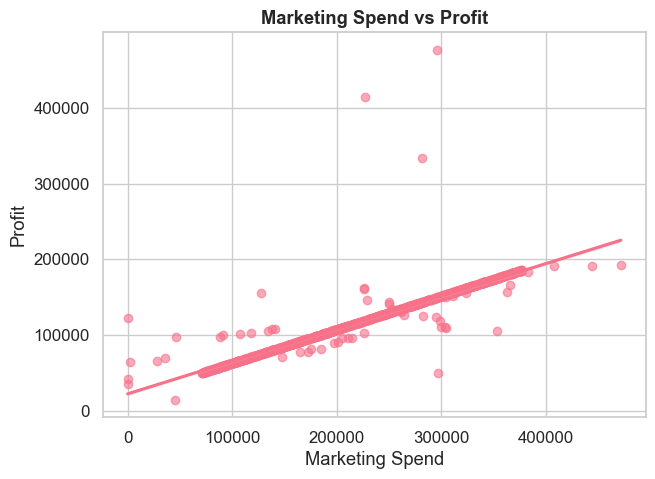

In [7]:
# Scatter plot with regression line to analyze the linear relationship
# between Marketing Spend and Profit.
# The regplot shows the direction and strength of the relationship.
plt.figure(figsize=(7,5))
sns.regplot(x=df[col_spend], y=df[col_profit], scatter_kws={'alpha':0.6})
plt.title(f"{col_spend} vs {col_profit}", weight='bold')
plt.xlabel(col_spend)
plt.ylabel(col_profit)
plt.show()


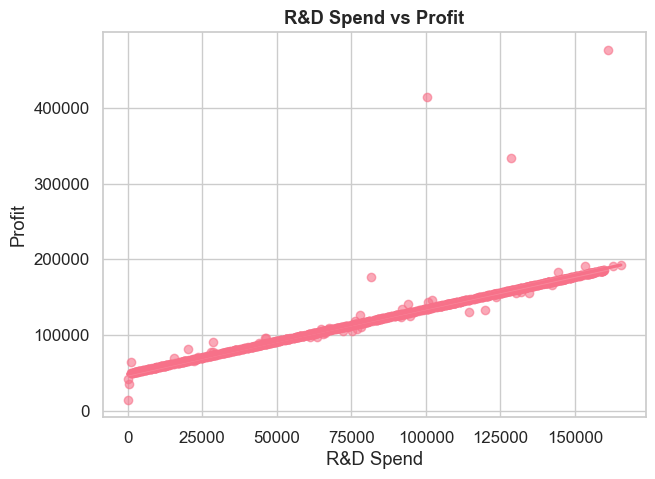

In [8]:
# Scatter plot: R&D Spend vs Profit (Seaborn)
plt.figure(figsize=(7,5))
sns.regplot(x=df["R&D Spend"], y=df[col_profit], scatter_kws={'alpha':0.6})
plt.title("R&D Spend vs Profit", weight='bold')
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()


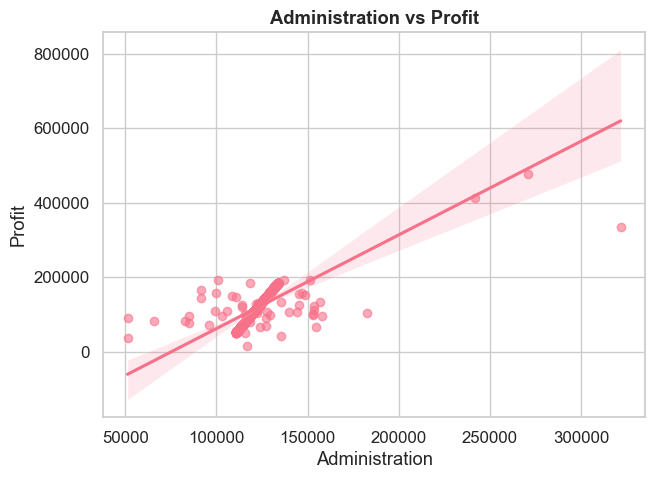

In [9]:
# Scatter plot: Administration vs Profit (Seaborn)
plt.figure(figsize=(7,5))
sns.regplot(x=df["Administration"], y=df[col_profit], scatter_kws={'alpha':0.6})
plt.title("Administration vs Profit", weight='bold')
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()



# 7. Correlation Matrix + Heatmap

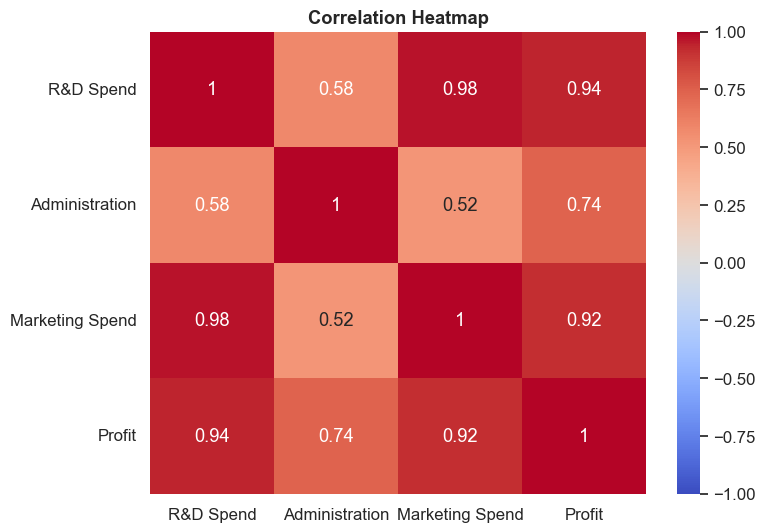

In [10]:
# Compute correlation matrix for all numeric variables.
# Purpose: Identify the strength and direction of linear relationships
# between spending categories and Profit.
corr = numeric.corr()
# Visualize the correlation matrix using a heatmap.
# The heatmap color intensity shows positive/negative correlations,
# helping identify which factors most influence Profit.
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap", weight="bold")
plt.show()


# 8. State-wise Profit Comparison

## Seaborn Barplot of Average Profit per State

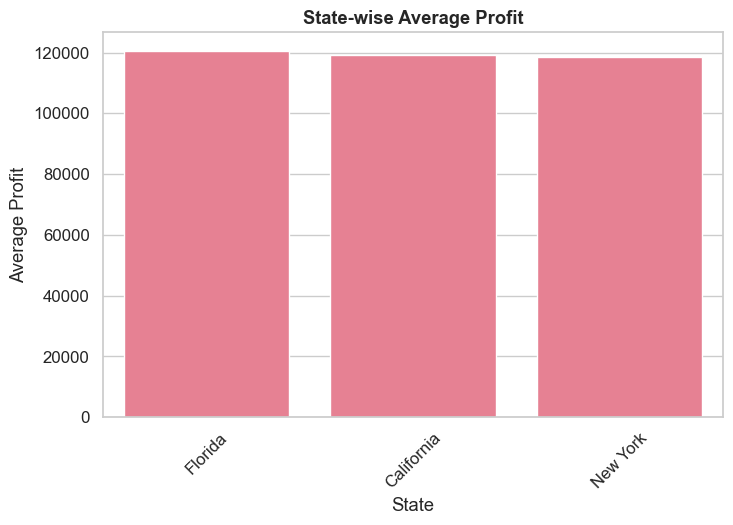

In [11]:
# Compute mean profit for each state, then visualize as a barplot.
# Purpose: Compare profitability across different regions.
plt.figure(figsize=(8,5))
state_mean = df.groupby(col_state)[col_profit].mean().sort_values(ascending=False)
sns.barplot(x=state_mean.index, y=state_mean.values)
plt.xticks(rotation=45)
plt.title("State-wise Average Profit", weight="bold")
plt.ylabel("Average Profit")
plt.show()


## Interactive Plotly Bar Chart

In [12]:
# Interactive version of the state-wise mean profit comparison.
# Allows hovering over bars to get precise profit values.
fig = px.bar(state_mean, title="State-wise Mean Profit (Interactive)", labels={'value':'Mean Profit'})
fig.show()


# 9. Insights from Graphs 

In [13]:
insights = []

# Correlation insights
corr_sort = corr.abs().unstack().sort_values(ascending=False)
corr_sort = corr_sort[corr_sort < 0.9999].drop_duplicates().head(5)
insights.append(" Top correlated variable pairs:")
for (x,y), v in corr_sort.items():
    insights.append(f" - {x} vs {y}: {v:.2f}")

# Spend vs Profit
r = df[col_spend].corr(df[col_profit])
insights.append(f"\n Spend-Profit Correlation: {r:.3f}")

# Outliers using z-score (SAFE VERSION)
z = np.abs(stats.zscore(numeric.fillna(numeric.mean())))
outlier_counts = pd.Series((z > 3).sum(), index=numeric.columns)

insights.append("\n Outlier detection:")
for col, cnt in outlier_counts.items():
    insights.append(f" - {col}: {cnt} high outlier values")

# Print insights
for line in insights:
    print(line)



 Top correlated variable pairs:
 - R&D Spend vs Marketing Spend: 0.98
 - Profit vs R&D Spend: 0.94
 - Profit vs Marketing Spend: 0.92
 - Profit vs Administration: 0.74
 - R&D Spend vs Administration: 0.58

 Spend-Profit Correlation: 0.916

 Outlier detection:
 - R&D Spend: 12 high outlier values
 - Administration: 12 high outlier values
 - Marketing Spend: 12 high outlier values
 - Profit: 12 high outlier values
